# Testes de Hipóteses

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import scipy.stats as st
sns.set()

In [2]:
seed = np.random.seed(8754487)

In [3]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [4]:
# Carregando dataset
alcohol_consumption = pd.read_csv('../databases/student-mat.zip', compression='zip')
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
filtro = alcohol_consumption['Dalc'] == 0
alcohol_consumption[filtro]
#t_obs = data[filtro]['player_height'].mean() - data[~filtro]['player_height'].mean()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


# Teste 1

Desejamos testar se há uma diferença significativa nas notas dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

**Raciocínio:** 
- 1 - Definir as hipóteses nula e alternativa.
- 2 - Encontrar a estatística de teste.
- 3 - Resampling/Shuffle de acordo com a hipótese nula.
- 4 - Encontrar os valores crítios/calcular o p-valor.
- 5 - Concluir (rejeitar ou não a hipótese).

    #### H0: μ1-2 = μ>=3

    #### H1: μ1-2 ≠ μ>=3 

        Ou ainda

    #### H0: μ1-2 − μ>=3 = 0 

    #### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de notas dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de notas dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='G3'>

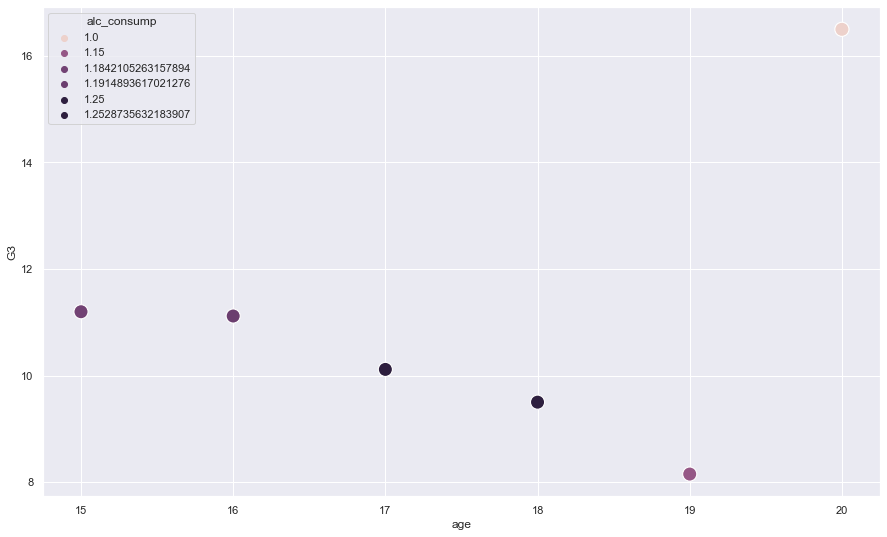

In [6]:
df1 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1

df_1_2 = (df1.groupby('age')
              .agg({'G3': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2

sns.scatterplot(x='age', y='G3', hue = "alc_consump" , s = 200, data=df_1_2)

<AxesSubplot:xlabel='age', ylabel='G3'>

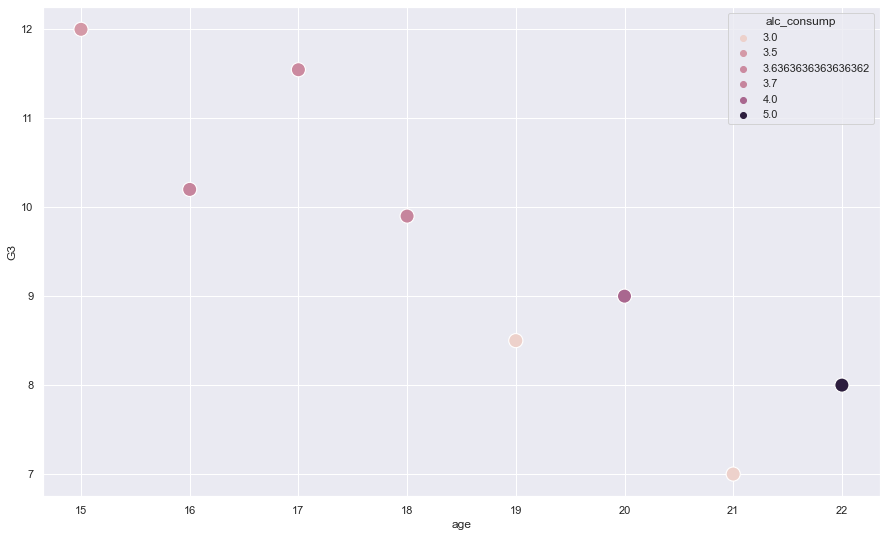

In [7]:
df2 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2

df_3_4_5 = (df2.groupby('age')
              .agg({'G3': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5

sns.scatterplot(x='age', y='G3', hue = "alc_consump" , s = 200, data=df_3_4_5)

In [8]:
def t_obs():
  # deve retornar o valor da estatística de teste
  return df_3_4_5['G3'].mean() - df_1_2['G3'].mean()

In [9]:
result = t_obs()
result

-1.5783735528821818

In [10]:
def shuffling(data):
  N = 5000
  filtro = data['G3']
  t_obs2 = t_obs()
  diffs = np.zeros(N)
  for i in range(N):
    np.random.shuffle(filtro.values)
    diffs[i] = t_obs2
  return diffs

diffs = shuffling(alcohol_consumption)

In [11]:
def critical_values(diffs):
  # deve retornar uma tupla com os valores criticos
  # calculando percentis para um intervalo de 95% de confiança (5% de significância)
  c_inf = np.percentile(diffs, 2.5)
  c_sup = np.percentile(diffs, 97.5)
  return (c_inf, c_sup)

(c_inf, c_sup) = critical_values(diffs)

In [12]:
def p_value(t_obs, diffs):
  # deve retornar o p-valor ou seja,
  # a probabilidade de termos uma diferença maior que a estatística de teste

  aux = 0
  vetor = diffs > t_obs
  for i in vetor:
      if i == True:
          aux += 1
  pvalue = aux/len(diffs)
  return pvalue

result = t_obs()
foo = p_value(result, diffs)

In [13]:
def resposta2(diffs, t_obs):
  # Retorne True caso rejeite a hipótese nula e False caso não rejeite.
  (c_inf, c_sup) = critical_values(diffs)
  foo = p_value(t_obs, diffs)
  print(foo)
  return not c_inf <= foo <= c_sup

resposta2(diffs, result)

0.0


True

### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre notas e consumo de álcool. Assim, rejeitamos a hipótese nula H0 .__

# Teste 2

Desejamos testar se há uma diferença significativa na média de faltas dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

#### H0: μ1-2 = μ>=3

#### H1: μ1-2 ≠ μ>=3 

    Ou ainda

#### H0: μ1-2 − μ>=3 = 0 

#### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de faltas dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de faltas dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='absences'>

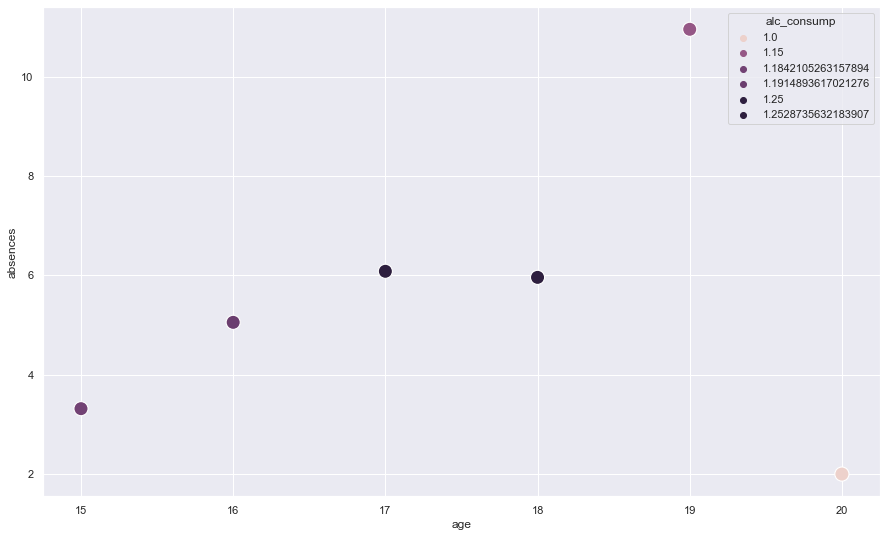

In [14]:
#Consumo de 1 a 2 vezes
df1_t2 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1_t2

df_1_2_t2 = (df1_t2.groupby('age')
              .agg({'absences': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2_t2

sns.scatterplot(x='age', y='absences', hue = "alc_consump" , s = 200, data=df_1_2_t2)

<AxesSubplot:xlabel='age', ylabel='absences'>

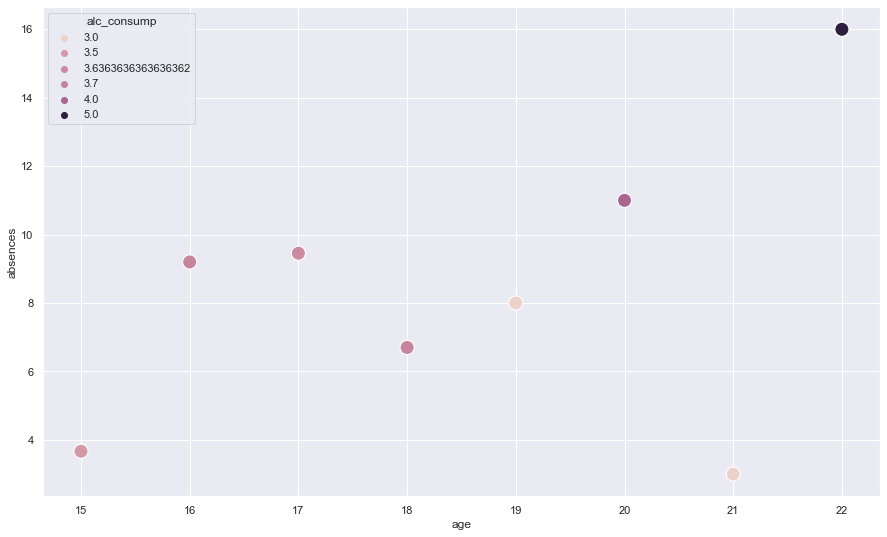

In [15]:
#Consumo de 3 a 5 vezes
df2_t2 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2_t2

df_3_4_5_t2 = (df2_t2.groupby('age')
              .agg({'absences': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5_t2

sns.scatterplot(x='age', y='absences', hue = "alc_consump" , s = 200, data=df_3_4_5_t2)

In [16]:
#IC para media de faltas de alunos que bebem até 2 vezes nos dias úteis da semana com 95% de confiança
media_ate_2_t2 = np.mean(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3 ,'absences'])
desvio_patrao_ate_2 = np.std(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3,'absences'])

z = 1.96
CI_inf_ate_2_t2 = media_ate_2_t2 - z*(desvio_patrao_ate_2/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3])))
CI_sup_ate_2_t2 = media_ate_2_t2 + z*(desvio_patrao_ate_2/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3])))

print('(', np.round(CI_inf_ate_2_t2,2), ',',np.round(CI_sup_ate_2_t2,2), ')')

( 4.58 , 6.29 )


In [17]:
#IC para media de faltas de alunos que bebem de 3 a 5 vezes nos dias úteis da semana com 95% de confiança
media_3_a_5_t2 = np.mean(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2 ,'absences'])
desvio_patrao_3_a_5 = np.std(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2,'absences'])

z = 1.96
CI_inf_3_a_5_t2 = media_3_a_5_t2 - z*(desvio_patrao_3_a_5/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2])))
CI_sup_3_a_5_t2 = media_3_a_5_t2 + z*(desvio_patrao_3_a_5/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2])))

print('(', np.round(CI_inf_3_a_5_t2,2), ',',np.round(CI_sup_3_a_5_t2,2), ')')

( 6.09 , 9.68 )


([<matplotlib.axis.YTick at 0x29712e255e0>,
 [Text(0, 0, '1 a 2'), Text(0, 1, '>= 3')])

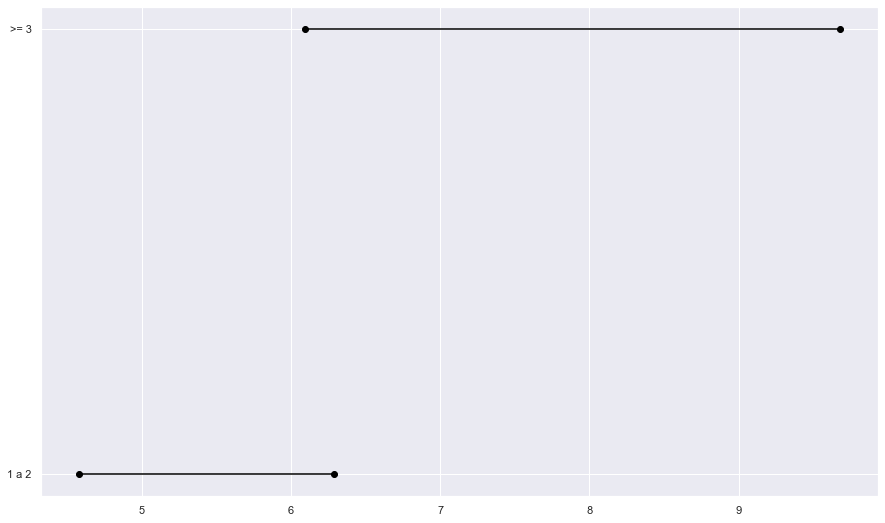

In [18]:
#Plotando visualização dos intervalos de confiança

data_dict = {}
data_dict['DALC'] = ['1 a 2','>= 3']
data_dict['INFERIOR'] = [CI_inf_ate_2_t2,CI_inf_3_a_5_t2]
data_dict['SUPERIOR'] = [CI_sup_ate_2_t2,CI_sup_3_a_5_t2]
dataset = pd.DataFrame(data_dict)

for INFERIOR,SUPERIOR,y in zip(dataset['INFERIOR'],dataset['SUPERIOR'],range(len(dataset))):
    plt.plot((INFERIOR,SUPERIOR),(y,y),'ro-',color='black')
plt.yticks(range(len(dataset)),list(dataset['DALC']))

In [19]:
def bootstrap_mean(df1, df2, column, n=10000):
    size1 = len(df1)
    size2 = len(df2)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values_diff = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(size1, replace=True)
        sample2 = df2[column].sample(size2, replace=True)
        values1[i] = sample1.mean()
        values2[i] = sample2.mean()
        values_diff[i] = sample1.mean() - sample2.mean()
    return values1, values2, values_diff

ate_2_t2 = alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3]
maior_igual_3_t2 = alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2]
col = 'absences'
v_ate_2_t2, v_maior_igual_3_t2, v_diff = bootstrap_mean(ate_2_t2, maior_igual_3_t2, col)

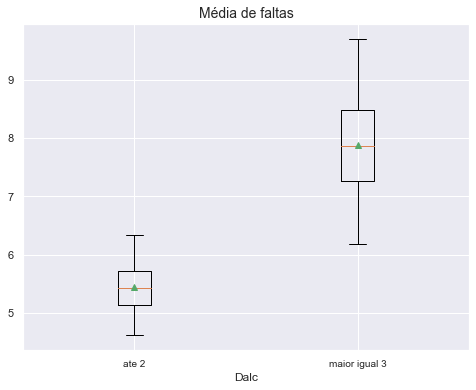

In [20]:
bp_data_t2 = [v_ate_2_t2, v_maior_igual_3_t2]

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data_t2, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['ate 2', 'maior igual 3'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('Dalc', fontsize=12)
plt.title('Média de faltas', fontsize=14)
plt.show()

In [21]:
def percent_t2(df1_t2, df2_t2, column, alpha):
  n = 10000
  size1 = len(df1_t2)
  size2 = len(df2_t2)
  values1 = np.zeros(n)
  values2 = np.zeros(n)
  values_diff = np.zeros(n)

  for i in range(n):
    sample1 = df1_t2[column].sample(size1, replace=True)
    sample2 = df2_t2[column].sample(size2, replace=True)
    values1[i] = sample1.mean()
    values2[i] = sample2.mean()
    values_diff[i] = sample1.mean() - sample2.mean()
  
  a = np.percentile(values_diff, ((alpha*100)/2)).round(4)
  b = np.percentile(values_diff, 100-((alpha*100)/2)).round(4)

  return a <= 0 <= b

In [22]:
#Rejeita-se H0.
ate_2_t2 = alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3]
maior_igual_3_t2 = alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2]
col = 'absences'
alpha = 0.05
result_t2 = percent_t2(ate_2_t2, maior_igual_3_t2, col, alpha)
print(result_t2)

False


### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre frequência nas aulas e consumo de álcool. Assim, rejeitamos a hipótese nula H0 .__

# Teste 3

Desejamos testar se há uma diferença significativa na média de tempo de estudo dos alunos que consomem álcool de 1-2 dias e dos que consomem a partir de 3 dias na semana, a um nível de significância de 5%.

#### H0: μ1-2 = μ>=3

#### H1: μ1-2 ≠ μ>=3 

    Ou ainda

#### H0: μ1-2 − μ>=3 = 0 

#### H1: μ1-2 − μ>=3 ≠ 0

Hipótese nula: Média de tempo de estudo dos alunos que consomem álcool de 1-2 dias é igual à dos que consomem a partir de 3 dias na semana

Hipótese alternativa: Média de tempo de estudo dos alunos que consomem álcool de 1-2 dias é diferente à dos que consomem a partir de 3 dias na semana

<AxesSubplot:xlabel='age', ylabel='studytime'>

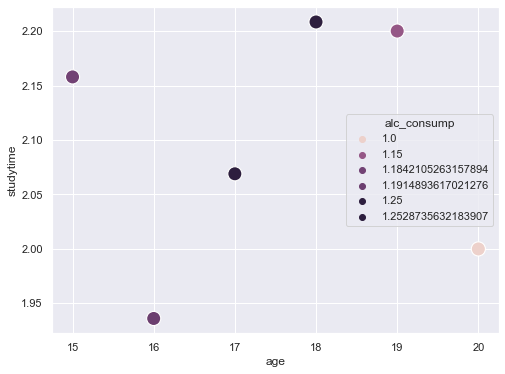

In [23]:
#Consumo de 1 a 2 vezes
df1_t3 = alcohol_consumption[alcohol_consumption['Dalc'] < 3]
df1_t3

df_1_2_t3 = (df1_t3.groupby('age')
              .agg({'studytime': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_1_2_t3

sns.scatterplot(x='age', y='studytime', hue = "alc_consump" , s = 200, data=df_1_2_t3)

<AxesSubplot:xlabel='age', ylabel='studytime'>

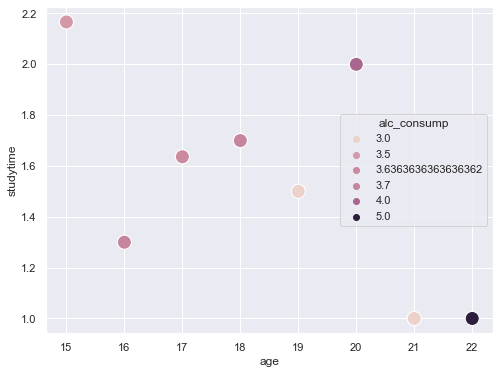

In [24]:
#Consumo de 3 a 5 vezes
df2_t3 = alcohol_consumption[alcohol_consumption['Dalc'] > 2]
df2_t3

df_3_4_5_t3 = (df2_t3.groupby('age')
              .agg({'studytime': 'mean', 'Dalc': 'mean'}) 
              .reset_index()
              .rename(columns={'Dalc':'alc_consump'}))

df_3_4_5_t3

sns.scatterplot(x='age', y='studytime', hue = "alc_consump" , s = 200, data=df_3_4_5_t3)

In [25]:
#IC para media de tempo de estudo que bebem até 2 vezes nos dias úteis da semana com 95% de confiança
media_ate_2_t3 = np.mean(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3 ,'studytime'])
desvio_patrao_ate_2_t3 = np.std(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3,'studytime'])

z = 1.96
CI_inf_ate_2_t3 = media_ate_2_t3 - z*(desvio_patrao_ate_2_t3/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3])))
CI_sup_ate_2_t3 = media_ate_2_t3 + z*(desvio_patrao_ate_2_t3/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3])))

print('(', np.round(CI_inf_ate_2_t3,2), ',',np.round(CI_sup_ate_2_t3,2), ')')

( 2.0 , 2.18 )


In [26]:
#IC para media de faltas de alunos que bebem de 3 a 5 vezes nos dias úteis da semana com 95% de confiança
media_3_a_5_t3 = np.mean(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2 ,'studytime'])
desvio_patrao_3_a_5_t3 = np.std(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2,'studytime'])

z = 1.96
CI_inf_3_a_5_t3 = media_3_a_5_t3 - z*(desvio_patrao_3_a_5_t3/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2])))
CI_sup_3_a_5_t3 = media_3_a_5_t3 + z*(desvio_patrao_3_a_5_t3/np.sqrt(len(alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2])))

print('(', np.round(CI_inf_3_a_5_t3,2), ',',np.round(CI_sup_3_a_5_t3,2), ')')

( 1.39 , 1.83 )


([<matplotlib.axis.YTick at 0x29712fc36a0>,
 [Text(0, 0, '1 a 2'), Text(0, 1, '>= 3')])

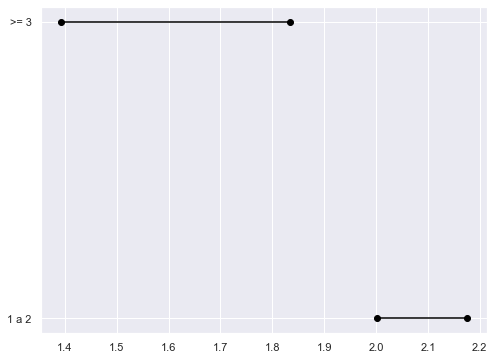

In [27]:
#Plotando visualização dos intervalos de confiança

data_dict = {}
data_dict['DALC'] = ['1 a 2','>= 3']
data_dict['INFERIOR'] = [CI_inf_ate_2_t3,CI_inf_3_a_5_t3]
data_dict['SUPERIOR'] = [CI_sup_ate_2_t3,CI_sup_3_a_5_t3]
dataset = pd.DataFrame(data_dict)

for INFERIOR,SUPERIOR,y in zip(dataset['INFERIOR'],dataset['SUPERIOR'],range(len(dataset))):
    plt.plot((INFERIOR,SUPERIOR),(y,y),'ro-',color='black')
plt.yticks(range(len(dataset)),list(dataset['DALC']))

In [28]:
#bootstrap mean
ate_2_t3 = alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3]
maior_igual_3_t3 = alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2]
col = 'studytime'
v_ate_2_t3, v_maior_igual_3_t3, v_diff_t3 = bootstrap_mean(ate_2_t3, maior_igual_3_t3, col)

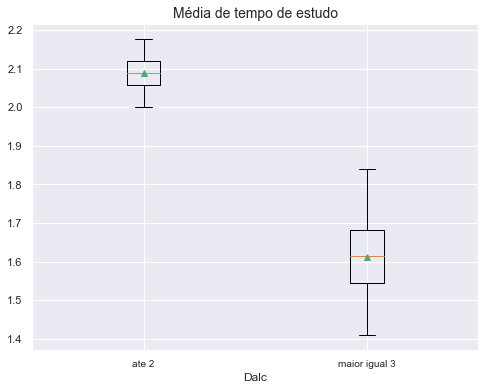

In [29]:
bp_data_t3 = [v_ate_2_t3, v_maior_igual_3_t3]

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data_t3, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['ate 2', 'maior igual 3'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('Dalc', fontsize=12)
plt.title('Média de tempo de estudo', fontsize=14)
plt.show()

In [30]:
def percent_t3(df1_t3, df2_t3, column, alpha):
  n = 10000
  size1 = len(df1_t3)
  size2 = len(df2_t3)
  values1 = np.zeros(n)
  values2 = np.zeros(n)
  values_diff = np.zeros(n)

  for i in range(n):
    sample1 = df1_t3[column].sample(size1, replace=True)
    sample2 = df2_t3[column].sample(size2, replace=True)
    values1[i] = sample1.mean()
    values2[i] = sample2.mean()
    values_diff[i] = sample1.mean() - sample2.mean()
  
  a = np.percentile(values_diff, ((alpha*100)/2)).round(4)
  b = np.percentile(values_diff, 100-((alpha*100)/2)).round(4)

  return a <= 0 <= b

In [31]:
#Rejeita-se H0.
ate_2_t3 = alcohol_consumption.loc[alcohol_consumption['Dalc'] < 3]
maior_igual_3_t3 = alcohol_consumption.loc[alcohol_consumption['Dalc'] > 2]
col = 'studytime'
alpha = 0.05
result_t3 = percent_t3(ate_2_t3, maior_igual_3_t3, col, alpha)
print(result_t3)

False


### Conclusão 

__A abordagem do Teste de Hipótese demonstra que existe uma relação estatisticamente signifcante entre tempo de estudo e consumo de álcool. Assim, rejeitamos a hipótese nula H0 .__